### Coupang 크롤링

In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import nltk

### 주방용품 Top120, 쿠팡 랭킹순_판매실적, 사용자 선호도 자체 고려 (자체)

In [9]:
url_cp_kit = 'https://www.coupang.com/np/categories/185669?listSize=120&brand=&offerCondition=&filterType=&isPriceRange=false&minPrice=&maxPrice=&page=1&channel=user&fromComponent=N&selectedPlpKeepFilter=&sorter=bestAsc&filter=&rating=0'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'}

res_cp_kit = requests.get(url_cp_kit, headers=headers)
soup_cp_kit = BeautifulSoup(res_cp_kit.content, 'html.parser')
data_cp_kit = soup_cp_kit.find_all('div', {'class':'name'})

print(url_cp_kit)

https://www.coupang.com/np/categories/185669?listSize=120&brand=&offerCondition=&filterType=&isPriceRange=false&minPrice=&maxPrice=&page=1&channel=user&fromComponent=N&selectedPlpKeepFilter=&sorter=bestAsc&filter=&rating=0


In [10]:
for item_cp_kit in data_cp_kit:
    print(item_cp_kit.get_text())


    냠냠티처 유아 식판식: 엄마는 편하고 아이는 잘 먹는, 비타북스


    쿠팡 브랜드 - 코멧 키친 세라믹 냄비 3종 세트, 양수 냄비 16cm + 편수 냄비 18cm + 양수 냄비 20cm


    쿠팡 브랜드 - 코멧 키친 왕계란말이 멀티팬 대형, 26 x 23cm, 1개


    키친플라워 쿠킨 2in1 샌드위치 와플메이커, KFW-JT300DCP


    쿠팡 브랜드 - 코멧 깨끗한 2겹 무형광 핸드타올, 100매, 50개


    쿠팡 브랜드 - 코멧 키친 마블코팅 프라이팬, 30cm


    크리넥스 안심 3겹 키친타올 130매, 12롤, 1팩


    코멧 음식물 쓰레기통 그레이


    쿠팡 브랜드 - 코멧 키친 천연펄프 키친타올 롤형 130매 2겹, 6롤, 4팩


    쿠팡 브랜드 - 코멧 키친 천연펄프 뽑아쓰는 키친타올 130매 2겹, 3개입, 4팩


    쿠팡 브랜드 - 코멧 천연펄프 키친타월 3겹 160매, 6롤, 1팩


    SK매직 고급형 전자레인지 20L, MWO-20EC2


    쿠팡 브랜드 - 코멧 키친 열센서 IH 인덕션 궁중팬, 28cm, 1개


    쿠팡 브랜드 - 코멧 키친 오일로드 프라이팬, 28cm


    잘풀리는집 맥스 다용도 키친타올 250매, 12개입, 1개


    코멧 BPA프리 밀폐용기 10조 세트, 1세트


    코멧 모던 헤링본 양면 쿠션 주방매트, 차콜 + 아이보리 (S)


    쿠팡 브랜드 - 코멧 키친 3중코팅 4구 에그팬, 27cm, 1개


    아이끌레 실리콘 만능 뚜껑 6종 세트 2p


    스토리쿡 스마트 채칼 6종세트, 1세트, 혼합색상


    마케마케 깨끗한 천연펄프 키친타월 150매, 8개입, 1팩


    스타벅스 텀블러 콜드컵(보온 보냉) 473ml, 실버


    스탠리 어드벤쳐 워터저그, 그린, 3.8L


    스탠리 어드벤쳐 쿨러, 그린, 15.1L


    키친플라워 쿠킨 IH 인덕션 그린우드 냄비 4종 

In [11]:
item_list_cp_kit = []

for item_cp_kit in data_cp_kit:
    items_cp_kit = item_cp_kit.get_text()
    item_list_cp_kit.append(items_cp_kit)           

str_itemlist_cp_kit = str(item_list_cp_kit)

tokenized_cp_kit = nltk.word_tokenize(str_itemlist_cp_kit)

word_dic_cp_kit = {}

for word in tokenized_cp_kit:
    if word not in word_dic_cp_kit:
        word_dic_cp_kit[word] = 1 # changed from "0" to "1"
    else:
        word_dic_cp_kit[word] += 1
        
sorted_word_dic_cp_kit = sorted(word_dic_cp_kit.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_cp_kit[:50]:
    print("{0}({1})".format(word, count), end=" ")

,(291) '\n(120) '(120) +(31) -(28) 쿠팡(27) 브랜드(27) 코멧(25) 1개\n(23) 키친(18) 세트(14) 1세트\n(11) x(10) 프라이팬(9) 냄비(8) 키친타올(8) 마케마케(8) 천연펄프(7) ((7) )(7) 1팩\n(6) 다용도(6) 텀블러(6) 그레이(6) 테팔(6) 3겹(5) 28cm(5) 4p(5) 락앤락(5) 대형(4) 키친플라워(4) 쿠킨(4) 130매(4) 6롤(4) 뽑아쓰는(4) 키친타월(4) \n(4) 150매(4) 에어프라이어(4) 블랙(4) 수세미(4) 2개\n(4) 냉장고(4) 중형(4) 2p(4) 양수(3) 와플메이커(3) 2겹(3) 그레이\n(3) 4팩\n(3) 

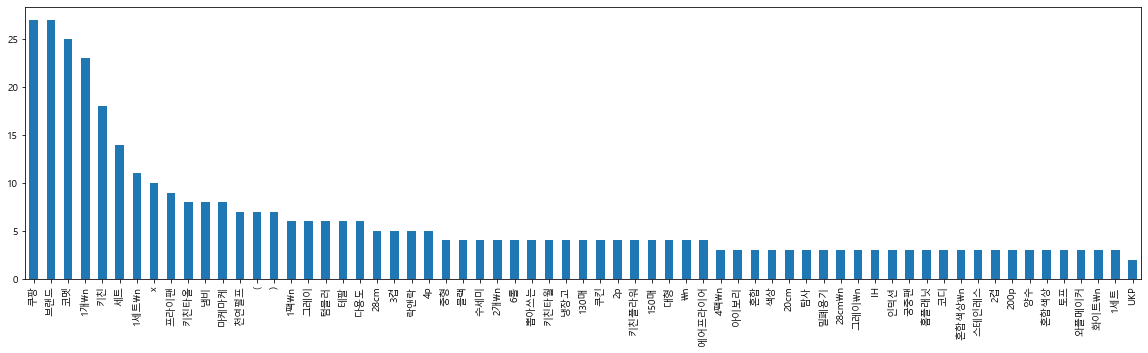

In [16]:
word_frequency_cp_kit = nltk.FreqDist(word_dic_cp_kit)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

cp_kit_df = pd.DataFrame(list(word_frequency_cp_kit.values()), word_frequency_cp_kit.keys())
result_cp_kit = cp_kit_df.sort_values([0], ascending=False)

result_cp_kit[5:70].plot(kind='bar', legend=False, figsize=(20,5))
plt.show()

### 홈 인테리어 Top 120

In [13]:
url_cp_fur = 'https://www.coupang.com/np/categories/184555?traid=home_CategoryBest_quick_link'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'}

res_cp_fur = requests.get(url_cp_fur, headers=headers)
soup_cp_fur = BeautifulSoup(res_cp_fur.content, 'html.parser')
data_cp_fur = soup_cp_fur.find_all('div', {'class':'name'})

print(url_cp_fur)

https://www.coupang.com/np/categories/184555?traid=home_CategoryBest_quick_link


In [14]:
for item_cp_fur in data_cp_fur:
    print(item_cp_fur.get_text())


    코멧 컴퓨터 책상 1260, 블랙


    쿠팡 브랜드 - 코멧 홈 헤링본 호텔 수건 200g 40수 코마사, 차콜 그레이, 10개


    코멧 홈 이동식 3단 빨래바구니, 1개


    쿤달 퍼퓸 디퓨저 200ml 3개 + 섬유스틱 15개 세트, 블랙체리향


    쿠팡 브랜드 - 코멧 홈 퓨어 마이크로 필터 샤워기, 1개


    쿠팡 브랜드 - 코멧 코팅 논슬립 옷걸이, 그레이, 30개


    쿠팡 브랜드 - 코멧 호텔 수건 150g 30수 면사, 다크그레이, 10개


    코멧 홈 베이직 스탠드행거, 화이트


    쿠팡 브랜드 - 코멧 3단 이동식 틈새 선반, 1개


    코멧 디퓨저 200ml 2개 + 섬유스틱 10개 세트, 에이프릴 프레쉬


    쿠팡 브랜드 - 코멧 메탈 선반 5단 900 x 350 x 1500mm, 실버


    쿠팡 브랜드 - 코멧 메탈 선반 5단 740 x 340 x 1500mm, 화이트


    코멧 멀티 책상 1260, 블랙


    코멧 홈 논슬립 코팅 회전형 치마바지걸이, 20개입


    코멧 무소음 변기커버 대형, 화이트, 1개


    코멧 홈 우드볼 도어행거, 10구, 혼합색상


    부케가르니 퍼퓸드 샤쉐 옷장방향제 소프트코튼, 2.3g, 10개


    이지드롭 일회용 변기크리너 세트 핸들 + 리필브러쉬 12p + 전용 고리, 혼합 색상, 1세트


    베이스알파에센셜 논슬립 안전 욕실화 라이트그레이 + 다크그레이, 1세트


    코멧 홈 콩나물 재배기, 1개


    샤바스 스칸디나 멀티테이블 1200, 티크판넬 + 블랙프레임


    코멧 4단 책장선반, 블랙


    쿠팡 브랜드 - 코멧 메탈 선반 3단 590 x 340 x 800 mm, 화이트


    리빙톡 조립식 투명 신발정리함 12개 1세트 화이트 대 33x23x14.5cm 신발정리대, 12개입


    쿠팡 브랜드 - 코멧 홈 대용량 베이직 모던 옥스퍼드 리빙박스 100L, 그

In [15]:
item_list_cp_fur = []

for item_cp_fur in data_cp_fur:
    items_cp_fur = item_cp_fur.get_text()
    item_list_cp_fur.append(items_cp_fur)           

str_itemlist_cp_fur = str(item_list_cp_fur)

tokenized_cp_fur = nltk.word_tokenize(str_itemlist_cp_fur)

word_dic_cp_fur = {}

for word in tokenized_cp_fur:
    if word not in word_dic_cp_fur:
        word_dic_cp_fur[word] = 1 # changed from "0" to "1"
    else:
        word_dic_cp_fur[word] += 1
        
sorted_word_dic_cp_fur = sorted(word_dic_cp_fur.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_cp_fur[:50]:
    print("{0}({1})".format(word, count), end=" ")

,(141) '\n(60) '(60) 코멧(26) +(21) -(16) 쿠팡(15) 브랜드(15) 홈(11) 1개\n(11) 세트(9) x(9) 그레이(7) 1세트\n(7) 3단(5) 디퓨저(5) 200ml(5) 논슬립(5) 화이트\n(5) ((5) )(5) 블랙\n(4) 샤워기(4) 선반(4) 혼합(4) \n(4) 호텔(3) 수건(3) 10개\n(3) 쿤달(3) 퍼퓸(3) 섬유스틱(3) 필터(3) 옷걸이(3) 2개(3) 메탈(3) 대형(3) 화이트(3) 전용(3) 색상(3) 샤바스(3) 4단(3) 2p(3) 다용도(3) [(2) 책상(2) 1260(2) 헤링본(2) 200g(2) 40수(2) 

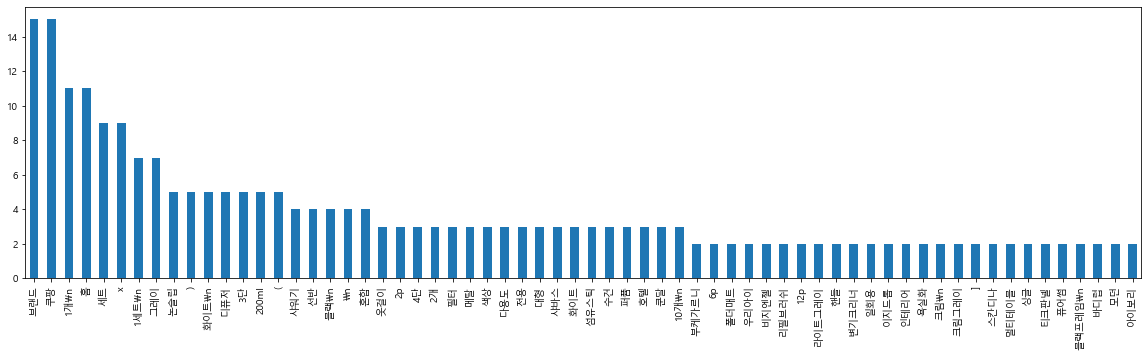

In [19]:
word_frequency_cp_fur = nltk.FreqDist(word_dic_cp_fur)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

cp_fur_df = pd.DataFrame(list(word_frequency_cp_fur.values()), word_frequency_cp_fur.keys())
result_cp_fur = cp_fur_df.sort_values([0], ascending=False)

result_cp_fur[6:70].plot(kind='bar', legend=False, figsize=(20,5))
plt.show()

### 문구/오피스 Top120

In [20]:
url_cp_office = 'https://www.coupang.com/np/categories/177295?traid=home_CategoryBest_quick_link'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'}

res_cp_office = requests.get(url_cp_office, headers=headers)
soup_cp_office = BeautifulSoup(res_cp_office.content, 'html.parser')
data_cp_office = soup_cp_office.find_all('div', {'class':'name'})

print(url_cp_office)

https://www.coupang.com/np/categories/177295?traid=home_CategoryBest_quick_link


In [21]:
for item_cp_office in data_cp_office:
    print(item_cp_office.get_text())


    마이리틀타이거 폼클레이 6색 + 놀이카드 12p + 모양틀 6p 세트, 1세트, 혼합색상


    코멧 컴퓨터 책상 1260, 블랙


    샤바스 스칸디나 멀티테이블 1200, 티크판넬 + 블랙프레임


    코멧 멀티 책상 1260, 블랙


    마이리틀타이거 물감 놀이 세트, 7색


    샤오미 복부지압 마사지 다이어트 스마트 회전 훌라후프


    탐사 스케치북 도화지 130g 8절, 250매


    아모스 아이클레이 15종 세트, 혼합색상, 50g


    플레이도우 셀러브레이션 파티 믹스팩, 혼합 색상, 998g


    종이나라 글리터 슬라임 8색 세트, 1세트, 하양, 분홍, 노랑, 주황, 초록, 파랑, 보라, 빨강


    신우 수채화 모자이크 아트 마스킹테이프 12종세트, 1세트, 혼합색상


    캐논 무한 무선 잉크젯 복합기 G3910, 단일 색상


    코멧 택배 이사용 종이박스 A골, 600 x 500 x 450mm, 6개


    문스타 F3-1 게이밍의자 의자, F3-1체어_베이지


    엠지 접이식 노트북 테이블 고급형, 블랙


    샤바스 스칸디나 멀티테이블 1000, 티크판넬 + 블랙프레임


    몬스터 클리어 겔 다용도 초강력 실리콘 멀티탭정리 투명 양면테이프 3m, 단일색상, 1개


    아모스 글라스테코 쥬얼리 데코, 혼합 색상, 1개


    아모스 글라스데코 9번 22ml x 18p + 40ml x 2p, 19색, 1세트


    영스타 다용도 펜꽂이, 그레이


    아모스 아이슬라임 베이스 2.1L, 1개, 단일색상


    샤바스 스칸디나 컴퓨터책상 1200, 티크판넬 + 블랙프레임


    아모스 글라스데코 썬데코 별자리 만들기, 12색, 1세트


    미니띠네 생일 파티 장식 스타 풍선세트, 로즈골드, 1세트


    아모스 탱탱아이클레이 과일야채가게 6색, 흰색, 초록, 빨강, 노랑, 보라, 주황, 18g


    다니카 프리미엄 와이드 

In [23]:
item_list_cp_office = []

for item_cp_office in data_cp_office:
    items_cp_office = item_cp_office.get_text()
    item_list_cp_office.append(items_cp_office)           

str_itemlist_cp_office = str(item_list_cp_office)

tokenized_cp_office = nltk.word_tokenize(str_itemlist_cp_office)

word_dic_cp_office = {}

for word in tokenized_cp_office:
    if word not in word_dic_cp_office:
        word_dic_cp_office[word] = 1 # changed from "0" to "1"
    else:
        word_dic_cp_office[word] += 1
        
sorted_word_dic_cp_office = sorted(word_dic_cp_office.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_cp_office[:50]:
    print("{0}({1})".format(word, count), end=" ")

,(156) '\n(60) '(60) +(12) 혼합(8) 1세트\n(8) 세트(7) 혼합색상\n(7) 코멧(7) 블랙\n(7) 플레이도우(7) 아모스(6) 색상(6) x(6) 1200(5) 책상(4) 샤바스(4) 스칸디나(4) 티크판넬(4) 블랙프레임\n(4) 의자(4) 1세트(3) 멀티테이블(3) 혼합색상(3) 색상\n(3) 다용도(3) 1개\n(3) 그레이\n(3) 화이트(3) 클레이(3) 마이리틀타이거(2) 6색(2) 12p(2) 컴퓨터(2) 1260(2) 멀티(2) 파티(2) 노랑(2) 주황(2) 초록(2) 보라(2) 택배(2) 이사용(2) 종이박스(2) 게이밍의자(2) 글라스데코(2) 단일색상\n(2) 로즈골드(2) 메쉬(2) 쿠팡(2) 

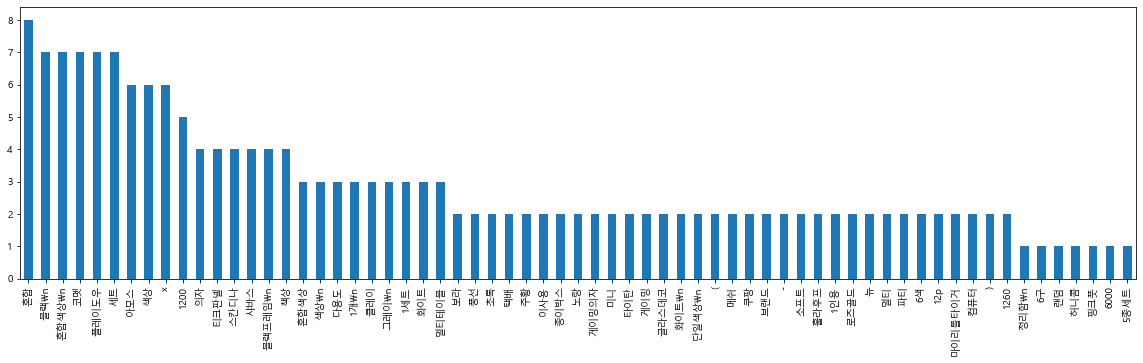

In [28]:
word_frequency_cp_office = nltk.FreqDist(word_dic_cp_office)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

cp_office_df = pd.DataFrame(list(word_frequency_cp_office.values()), word_frequency_cp_office.keys())
result_cp_office = cp_office_df.sort_values([0], ascending=False)

result_cp_office[5:70].plot(kind='bar', legend=False, figsize=(20,5))
plt.show()

### 생활용품 Top

In [3]:
url_cp_life = 'https://www.coupang.com/np/categories/115673'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'}

res_cp_life = requests.get(url_cp_life, headers=headers)
soup_cp_life = BeautifulSoup(res_cp_life.content, 'html.parser')
data_cp_life = soup_cp_life.find_all('div', {'class':'name'})

print(url_cp_life)

https://www.coupang.com/np/categories/115673


In [4]:
for item_cp_life in data_cp_life:
    print(item_cp_life.get_text())


    쿠팡 브랜드 - 코멧 일회용 마스크 화이트, 50개입, 1개


    뉴크린웰 비말마스크 대형 KF-AD 화이트, 20개입, 1개


    클로버마스크 일회용 마스크 검정, 50개입, 1개


    퓨어블루 황사방역용 마스크 화이트 대형 KF94, 1개입, 25개


    봄날애 마스크, 50개입, 1개


    퓨어엔젤 국내생산 3중구조 화이트 마스크, 50개입, 1개


    클로버 아동용 1회용부직포마스크 흰색, 50개입, 1개


    일회용 3중 부직포 마스크 핑크, 50개입, 1개


    일회용 3중 필터 마스크 핑크, 50개입, 1개


    라핑궈 일회용 일반 마스크 흰색, 50개입, 1개


    코멧 순백 3겹 라벤더 바닐라 롤화장지 30m, 30롤, 1개


    코멧 저자극 시그니처 아기 물티슈 엠보싱 캡형, 100매, 10팩


    코멧 아기물티슈 오리지널 캡형, 100매, 10팩


    evergreen 황사마스크 대형 KF80, 1개입, 50개


    에버그린 황사 마스크 대형 KF80, 25개입, 1개


    클로버 3중 필터 일회용 부직포 마스크 블루, 50개입, 1개


    3중 소형 일회용 아동마스크 화이트, 50개입, 1개


    일회용 3중 필터 마스크 블루, 50개입, 1개


    미티오 후레쉬 비말 마스크 덴탈형 대형 KF-AD, 50개입, 1개


    대성메디칼 국내생산 일회용 덴탈 화이트 마스크, 50개입, 1개


    뉴크린웰 스타일 황사마스크 화이트 대형 KF80, 50개입, 1개


    애니가드 황사 방역용 마스크 대형 KF94, 25개입, 1개


    쿠팡베이직 네추럴 3겹 천연펄프 롤화장지 30m, 30롤, 1개


    쿠팡 브랜드 - 코멧 3단 이동식 틈새 선반, 1개


    3겹 일회용 성인 마스크, 1개입, 50개


    크린웰 키즈 실드 비말마스크 중형 KF-AD 화이트, 20개입, 1개


    클로저 황사방역 마스크

In [5]:
item_list_cp_life = []

for item_cp_life in data_cp_life:
    items_cp_life = item_cp_life.get_text()
    item_list_cp_life.append(items_cp_life)           

str_itemlist_cp_life = str(item_list_cp_life)

tokenized_cp_life = nltk.word_tokenize(str_itemlist_cp_life)

word_dic_cp_life = {}

for word in tokenized_cp_life:
    if word not in word_dic_cp_life:
        word_dic_cp_life[word] = 1 # changed from "0" to "1"
    else:
        word_dic_cp_life[word] += 1
        
sorted_word_dic_cp_life = sorted(word_dic_cp_life.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_cp_life[:50]:
    print("{0}({1})".format(word, count), end=" ")

,(172) '\n(60) '(60) 1개\n(35) 마스크(28) 50개입(24) 일회용(17) 대형(14) 화이트(12) 코멧(11) KF94(11) 3중(9) 1개입(8) 쿠팡(6) 브랜드(6) -(6) 부직포(6) 캡형(6) 10팩\n(6) 흰색(5) 핑크(5) 100매(5) 황사마스크(5) 뉴크린웰(4) 3겹(4) KF80(4) 50개\n(4) 황사(4) 25개입(4) 블루(4) 소형(4) x(4) KF-AD(3) 20개입(3) 클로버마스크(3) 필터(3) 물티슈(3) 아기물티슈(3) 스타일(3) 중형(3) 그레이(3) 30개\n(3) 홈(3) 비말마스크(2) 국내생산(2) 클로버(2) 아동용(2) 롤화장지(2) 30m(2) 30롤(2) 

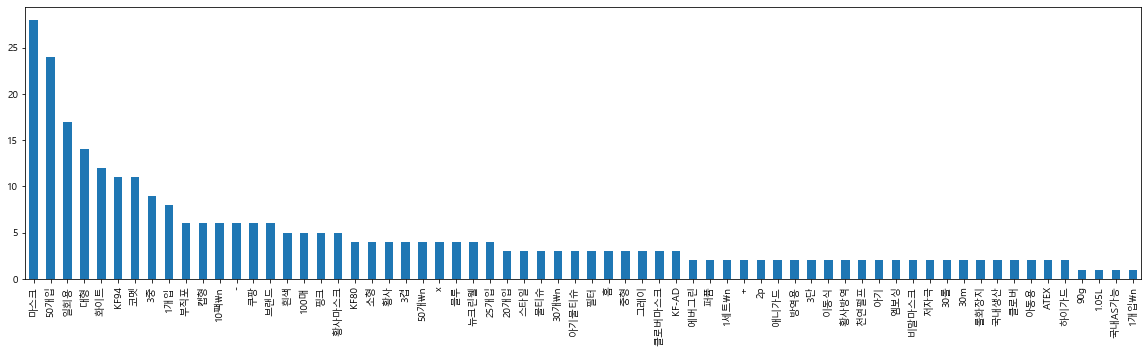

In [7]:
word_frequency_cp_life = nltk.FreqDist(word_dic_cp_life)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

cp_life_df = pd.DataFrame(list(word_frequency_cp_life.values()), word_frequency_cp_life.keys())
result_cp_life = cp_life_df.sort_values([0], ascending=False)

result_cp_life[4:70].plot(kind='bar', legend=False, figsize=(20,5))
plt.show()

### 완구 / 취미 Top

In [8]:
url_cp_things = 'https://www.coupang.com/np/categories/317779'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'}

res_cp_things = requests.get(url_cp_things, headers=headers)
soup_cp_things = BeautifulSoup(res_cp_things.content, 'html.parser')
data_cp_things = soup_cp_things.find_all('div', {'class':'name'})

print(url_cp_things)

https://www.coupang.com/np/categories/317779


In [9]:
for item_cp_things in data_cp_things:
    print(item_cp_things.get_text())


    닌텐도 스위치 네버송 핀스트라이프 합본, 단일상품


    아틀러스 닌텐도 SWITCH 진 여신전생3 녹턴 HD 리마스터 한글판, 단일상품


    꼬마어부 자석 낚시놀이 장난감 55pcs 세트, 혼합 색상


    국내포장 비즈조이 12컬러 시드비즈 동백이 팔찌 반지 비즈 (0.5 우레탄줄포함), 1세트, 3mm  비비드컬러


    샤오미 복부지압 마사지 다이어트 스마트 회전 훌라후프


    레고 클래식 브릭과 바퀴 조립박스 10715, 혼합 색상


    KIDS팡팡 알록달록 바다어부 자석 낚시놀이 67p, 혼합색상


    스티커로 얼굴 꾸미기:눈코입 스티커 168개, 삼성출판사


    베스트웨이 엠보싱 유아 사각 욕조 풀장 BW 51116, 화이트


    주영이앤씨 아쿠아 매직 물속친구들 만들기 플레이 세트, 혼합 색상


    홈인테리어 선인장 냉장고자석 6종 x 2p 세트, 흰색


    핑크퐁 아기상어 워터매직매트:물로콩콩 물로쓱쓱 무한반복 미술놀이, 삼성출판사


    먼치킨 목욕놀이 크레용, 5색


    베스트웨이 칵테일 캐노피 분수 물놀이 풀장 BW56432, 혼합색상


    에이유테크 레드윙블랙 성인용 전동킥보드 8A, 블랙


    마인크래프트 약탈자 전초기지 21159, 혼합색상


    레고 프렌즈 41335 미아의 트리하우스, 혼합 색상


    알파웨이 DIY 명화그리기세트 40 x 40 cm, 드림 빅 프린세스 에리얼


    카키블린 워터매트 촉감놀이 유아장난감, 혼합색상


    핑크퐁 스마트 모래놀이세트, 혼합 색상, 4.3kg


    핑크공주 퐁퐁비즈공예 24칸 DIY세트 A02 파스텔라인 우레탄줄 2p 포함, 혼합 색상


    레고 75551 미니언즈 미니언들과 숨겨진 방, 혼합색상


    케이엠엘리 3D 에펠탑 보석십자수 30 x 30 cm, 혼합색상, 1개


    인텍스 아쿠아 사각풀 57471, 혼합색상


    레고 슈퍼마리오 마리오의 집과 요시

In [10]:
item_list_cp_things = []

for item_cp_things in data_cp_things:
    items_cp_things = item_cp_things.get_text()
    item_list_cp_things.append(items_cp_things)           

str_itemlist_cp_things = str(item_list_cp_things)

tokenized_cp_things = nltk.word_tokenize(str_itemlist_cp_things)

word_dic_cp_things = {}

for word in tokenized_cp_things:
    if word not in word_dic_cp_things:
        word_dic_cp_things[word] = 1 # changed from "0" to "1"
    else:
        word_dic_cp_things[word] += 1
        
sorted_word_dic_cp_things = sorted(word_dic_cp_things.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_cp_things[:50]:
    print("{0}({1})".format(word, count), end=" ")

,(118) '\n(60) '(60) 혼합(20) 색상\n(19) 혼합색상\n(12) 레고(10) 세트(8) 닌텐도(4) +(4) 스위치(3) 단일상품\n(3) 자석(3) :(3) 스티커(3) x(3) 핑크퐁(3) 미술놀이(3) 코리아보드게임즈(3) 한글판(2) 낚시놀이(2) 스마트(2) 클래식(2) 삼성출판사\n(2) 베스트웨이(2) 풀장(2) 아쿠아(2) 2p(2) 아기상어(2) 워터매직매트(2) 목욕놀이(2) 프렌즈(2) DIY(2) 40(2) cm(2) 보석십자수(2) 30(2) 인텍스(2) 슈퍼마리오(2) 확장팩(2) 쿠팡(2) 브랜드(2) -(2) 코멧(2) 소프트(2) 훌라후프(2) 뽀로로(2) 보드게임(2) 배터리(2) 개선판(2) 

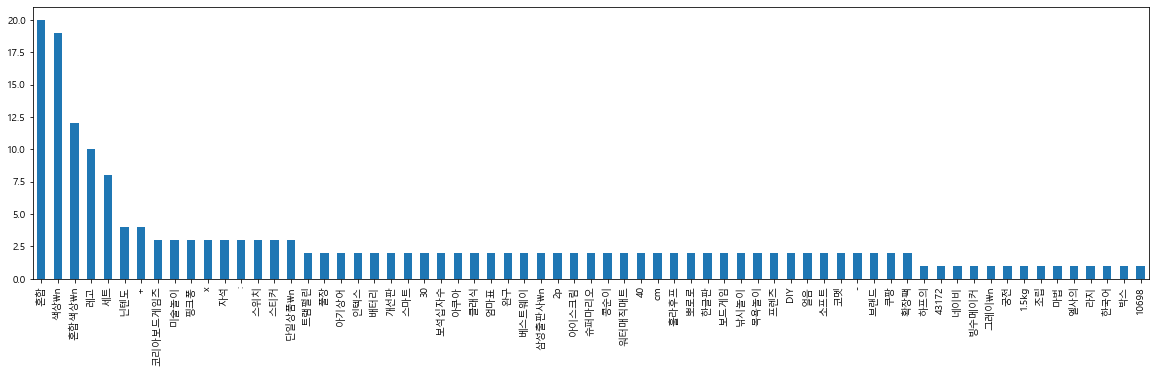

In [12]:
word_frequency_cp_things = nltk.FreqDist(word_dic_cp_things)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

cp_things_df = pd.DataFrame(list(word_frequency_cp_things.values()), word_frequency_cp_things.keys())
result_cp_things = cp_things_df.sort_values([0], ascending=False)

result_cp_things[3:70].plot(kind='bar', legend=False, figsize=(20,5))
plt.show()

### 해외 직구 순위_전체

In [16]:
url_cp_dir_all = 'https://www.coupang.com/np/coupangglobal'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'}

res_cp_dir_all = requests.get(url_cp_dir_all, headers=headers)
soup_cp_dir_all = BeautifulSoup(res_cp_dir_all.content, 'html.parser')
data_cp_dir_all = soup_cp_dir_all.find_all('div', {'class':'name'})

print(url_cp_dir_all)

https://www.coupang.com/np/coupangglobal


In [17]:
for item_cp_dir_all in data_cp_dir_all:
    print(item_cp_dir_all.get_text())


    재로우 우먼스 펨 도필러스 오럴 프로바이오틱 서플먼트 캡슐, 60개입, 2개


    Now Foods 실리마린 밀크 시슬 추출물 300mg 베지 캡슐, 1개


    제네럴밀스 시나몬 토스트 크런치 시리얼, 547g, 1개


    재로우 자로-도필러스 EPS 다이제스티브 프로바이오틱 유산균 5 빌리언 베지캡, 1개, 120개입


    스포츠리서치 트리플 스트렝스 오메가-3 피쉬 오일 1250mg 소프트젤, 180개입, 1개


    나우푸드 더블 스트랭스 L-아르기닌 1000mg 타블렛, 120개입, 1개


    머슬팜 컴뱃 울트라 웨이 프로틴 파우더 드링크 믹스 단백질 보충제, 초콜릿 밀크(Chocolate Milk), 2269g


    Now foods 로우 마카 750mg 베지 캡슐, 90개입, 1개


    Quaker 심플리 그래놀라 오트 허니 앤 아몬드, 793g, 1개


    비에스엔 신타-6 프로틴 파우더 드링크 믹스 단백질 보충제, 2.27kg, 초콜릿 밀크셰이크(Chocolate Milkshake)


    나우푸드 울트라 오메가 3 500 EPA 250 DHA 소프트젤, 180개입, 1개


    Jarrow Formulas 펜토텐산 B5 500mg 캡슐, 100개입, 1개


    Nature's Way 얼라이브! 원스 데일리 울트라 포텐시 멀티 비타민 타블렛 2종 세트, 120개입, 1개


    크리스탈라이트 드링크 믹스 온-더-고 패킷 체리 석류, 3.34g, 10개입


    제네럴밀스 리세스 퍼프, 586g, 1개


    나트롤 비오틴 뷰티 10000mcg 타블렛, 1개


    나우푸드 키토산 500mg 베지 캡슐, 240개입, 1개


    Nature's Way 얼라이브! 원스 데일리 우먼 울트라 포텐시 멀티-비타민 타블렛, 60개입, 1개


    커클랜드시그니춰 프로틴 바 60g, 초콜릿 브라우니 + 칩 쿠키 도우, 20개입


    허이펑 칠리 갈릭 소스, 226g

In [19]:
item_list_cp_dir_all = []

for item_cp_dir_all in data_cp_dir_all:
    items_cp_dir_all = item_cp_dir_all.get_text()
    item_list_cp_dir_all.append(items_cp_dir_all)           

str_itemlist_cp_dir_all = str(item_list_cp_dir_all)

tokenized_cp_dir_all = nltk.word_tokenize(str_itemlist_cp_dir_all)

word_dic_cp_dir_all = {}

for word in tokenized_cp_dir_all:
    if word not in word_dic_cp_dir_all:
        word_dic_cp_dir_all[word] = 1 # changed from "0" to "1"
    else:
        word_dic_cp_dir_all[word] += 1
        
sorted_word_dic_cp_dir_all = sorted(word_dic_cp_dir_all.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_cp_dir_all[:50]:
    print("{0}({1})".format(word, count), end=" ")

,(175) '\n(55) '(55) 1개\n(40) \n(11) 캡슐(9) 베지(8) 나우푸드(8) 타블렛(8) 초콜릿(8) ((7) )(7) Now(6) 시리얼(6) 1개(6) 얼라이브(6) 60개입(5) 제네럴밀스(5) 소프트젤(5) 울트라(5) 믹스(5) ``(5) 's(5) !(5) 비타민(5) ''(5) 2개\n(4) Foods(4) 밀크(4) 크런치(4) 180개입(4) 120개입(4) 프로틴(4) 드링크(4) Chocolate(4) 100개입(4) Nature(4) +(4) &(4) 재로우(3) 추출물(3) 오일(3) 단백질(3) 보충제(3) 오트(3) 허니(3) 500mg(3) Way(3) 포텐시(3) 멀티(3) 

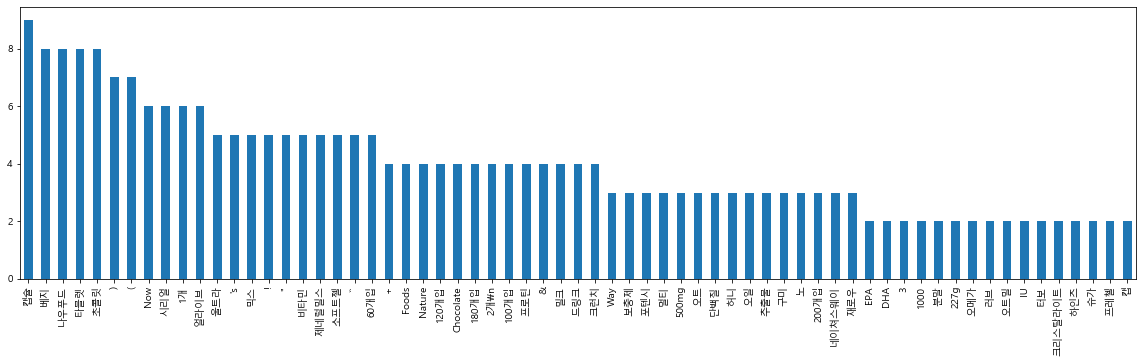

In [21]:
word_frequency_cp_dir_all = nltk.FreqDist(word_dic_cp_dir_all)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

cp_dir_all_df = pd.DataFrame(list(word_frequency_cp_dir_all.values()), word_frequency_cp_dir_all.keys())
result_cp_dir_all = cp_dir_all_df.sort_values([0], ascending=False)

result_cp_dir_all[5:70].plot(kind='bar', legend=False, figsize=(20,5))
plt.show()

### 해외 직구 순위 _ 생활용품

In [22]:
url_cp_dir_life = 'https://www.coupang.com/np/categories/450549'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'}

res_cp_dir_life = requests.get(url_cp_dir_life, headers=headers)
soup_cp_dir_life = BeautifulSoup(res_cp_dir_life.content, 'html.parser')
data_cp_dir_life = soup_cp_dir_life.find_all('div', {'class':'name'})

print(url_cp_dir_life)

https://www.coupang.com/np/categories/450549


In [24]:
for item_cp_dir_life in data_cp_dir_life:
    print(item_cp_dir_life.get_text())


    밴드에이드 플라스틱 스트립 브리서블 밴드, 60개입


    Now Foods 100% 퓨어 페퍼민트 에센셜 오일, 30ml, 1개


    Joy 울트라 주방세제 레몬 향, 1개, 887ml


    에코버 제로 내추럴 오토매틱 식기세척기용 타블렛 프레그런스 프리 25개입, 0.5kg, 1개


    Now Foods 100% 퓨어 에센셜 오일, 30ml, 1개


    Now Foods 피스풀 슬립 에센셜 오일, Peaceful Sleep


    에코버 린스 에이드 식기세척기용세제, 473ml, 1개


    나우푸드 퓨어 에센셜 방향아로마오일, Cedarwood


    나우푸드 자일리 화이트 투스페이스트 젤 플래티넘 민트 베이킹 소다, 1개, 181g


    베러라이프 주방세제 무향, 651ml, 1개


    Now Foods 100% 퓨어 로즈마리 에센셜오일, 30ml, 1개


    Now Foods 100% 퓨어 에센셜 방향아로마 오일, 118ml, 1개


    폴리덴트 안티박테리얼 덴탈 클리너 틀니 세정제 오버나이트 화이트닝 타블렛, 84개입


    Now Foods 100% 퓨어 에센셜 방향아로마 오일, 30ml, 1개


    인디고와일드 줌 클린 아로마테라피 액상세제, 1.89L, Frankincense & Myrrh


    Now Foods 100% 퓨어 에센셜 오일 레몬그라스, 30ml, 1개


    퓨렐 빨래 얼룩 제거 스틱, 142g, 1개


    밴드에이드 워터 블록 클리어 방수 밴드 2종 세트, 1개


    Suavitel 섬유유연제 필드 플라워, 1L, 1개


    Cascade 프리 & 클리어 디시워싱 세제 식기세척기용세제 레몬 에센스, 1개, 1.7kg


    Cascade 플래티넘 디쉬워셔 세제 액션팩 프레시 식기세척기용세제, 1개, 221g


    Now Foods 쟈스민 향 오일, 30ml, 1개


    미세스메이어스클린데이 소이 자캔들, Geran

In [25]:
item_list_cp_dir_life = []

for item_cp_dir_life in data_cp_dir_life:
    items_cp_dir_life = item_cp_dir_life.get_text()
    item_list_cp_dir_life.append(items_cp_dir_life)           

str_itemlist_cp_dir_life = str(item_list_cp_dir_life)

tokenized_cp_dir_life = nltk.word_tokenize(str_itemlist_cp_dir_life)

word_dic_cp_dir_life = {}

for word in tokenized_cp_dir_life:
    if word not in word_dic_cp_dir_life:
        word_dic_cp_dir_life[word] = 1 
    else:
        word_dic_cp_dir_life[word] += 1
        
sorted_word_dic_cp_dir_life = sorted(word_dic_cp_dir_life.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_cp_dir_life[:50]:
    print("{0}({1})".format(word, count), end=" ")

,(163) '\n(60) '(60) 1개\n(33) 에센셜(13) 1개(13) 오일(12) Now(11) Foods(11) 퓨어(9) 100(8) %(8) 30ml(7) 주방세제(6) 민트(6) &(6) 나우푸드(5) 울트라(4) 레몬(4) 미세스메이어스클린데이(4) 밴드에이드(3) 밴드(3) 식기세척기용(3) 타블렛(3) 식기세척기용세제(3) 방향아로마오일(3) 젤(3) 베러라이프(3) 클리너(3) 얼룩(3) 클리어(3) 섬유유연제(3) 세제(3) 프레시(3) 오리지널(3) 세탁(3) 팔모리브(3) 스트립(2) 향(2) 에코버(2) 오토매틱(2) 프리(2) 473ml(2) 자일리(2) 화이트(2) 투스페이스트(2) 플래티넘(2) 181g\n(2) 651ml(2) 방향아로마(2) 

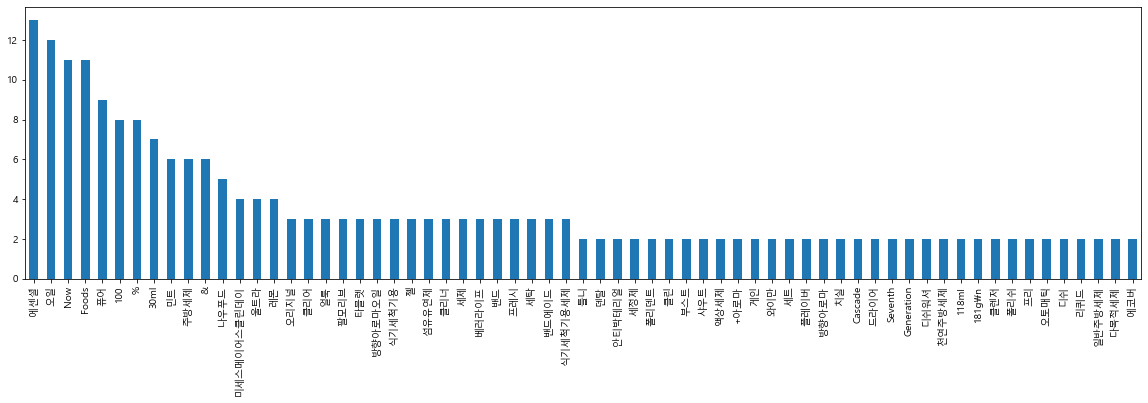

In [26]:
word_frequency_cp_dir_life = nltk.FreqDist(word_dic_cp_dir_life)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

cp_dir_life_df = pd.DataFrame(list(word_frequency_cp_dir_life.values()), word_frequency_cp_dir_life.keys())
result_cp_dir_life = cp_dir_life_df.sort_values([0], ascending=False)

result_cp_dir_life[5:70].plot(kind='bar', legend=False, figsize=(20,5))
plt.show()

### 해외 직구 순위 _ 주방용품

In [27]:
url_cp_dir_kit = 'https://www.coupang.com/np/categories/450728'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'}

res_cp_dir_kit = requests.get(url_cp_dir_kit, headers=headers)
soup_cp_dir_kit = BeautifulSoup(res_cp_dir_kit.content, 'html.parser')
data_cp_dir_kit = soup_cp_dir_kit.find_all('div', {'class':'name'})

print(url_cp_dir_kit)

https://www.coupang.com/np/categories/450728


In [28]:
for item_cp_dir_kit in data_cp_dir_kit:
    print(item_cp_dir_kit.get_text())


    Chef Craft 그레이터 화이트 핸들 강판/제스터, 1개


    Blender Bottle 프로스타크 스포츠물통/스포츠물병, Black, 651ml


    Norpro 실리콘 라운드 에그 팬케이크 링, 2개입


    글래드 샌드위치 지퍼 백 16.8 x 14.9cm, 100개입, 1개


    Chef Craft 국자 서빙 피스, Stainless Steel, 1개


    셰프크래프트 컷 앤 스프레드 버터나이프, Wood+Silver, 1개


    질리스 주방다용도가위 2종 세트, Black, Red, 1개


    바쿠빈 와인 세이버, Black, 1개


    Pyrex 믹스 대접 3종 세트, Clear, 1개


    프렙워크 프로그레시브 메저링 계량컵 600ml, 1ml


    앵커호킹 계량컵, Clear+Red, 473ml


    스카치브라이트 솝 디스펜싱 브러쉬 다용도세척솔, 1개


    셰프크래프트 플렉서블 터너 뒤집개 점보, 랜덤 발송, 1개


    블렌더바틀 프로스타크 쉐이커 보틀, White, 650ml


    블렌더바틀 프로스택 풀 보틀 쉐이커, 650.6ml, Plum


    셰프크래프트 핸들 피자커터 S, Wood, 1개


    노르프로 믹싱 볼 1.4L, Stainless Steel


    셰프크래프트 셀렉트 크롬 홀 으깨기 S, Black+Stainless Steel, 1개


    토볼로 스패츌러 스마일리 페이스, Yellow, 2개입


    이프유케어 If You Care 페이퍼 스낵 & 샌드위치 백 도시락포장봉투 포장백 쇼핑백, 48개입, 1개


    토볼로 나이론 플렉스 뒤집개 스마일리 페이스, Yellow, 1개


    리비 캑터스 마가리타 글래스 칵테일잔, 1개


    로지 실리콘 핸들 홀더, Black, 1개


    Interdesign 스폰지 트레이 수세미받침, Stainless Steel, 1개


    바큐빈 배큐엄 와인 스토퍼 

In [30]:
item_list_cp_dir_kit = []

for item_cp_dir_kit in data_cp_dir_kit:
    items_cp_dir_kit = item_cp_dir_kit.get_text()
    item_list_cp_dir_kit.append(items_cp_dir_kit)           

str_itemlist_cp_dir_kit = str(item_list_cp_dir_kit)

tokenized_cp_dir_kit = nltk.word_tokenize(str_itemlist_cp_dir_kit)

word_dic_cp_dir_kit = {}

for word in tokenized_cp_dir_kit:
    if word not in word_dic_cp_dir_kit:
        word_dic_cp_dir_kit[word] = 1 
    else:
        word_dic_cp_dir_kit[word] += 1
        
sorted_word_dic_cp_dir_kit = sorted(word_dic_cp_dir_kit.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_cp_dir_kit[:50]:
    print("{0}({1})".format(word, count), end=" ")

,(162) '\n(60) '(60) 1개\n(42) Black(6) 샌드위치(5) Stainless(5) Steel(5) 셰프크래프트(5) 질리스(5) 실리콘(4) 노르프로(4) 핸들(3) 글래드(3) x(3) 세트(3) Red(3) 프로그레시브(3) 블렌더바틀(3) 쉐이커(3) 보틀(3) White(3) 토볼로(3) Yellow(3) 혼합(3) 색상(3) 스냅락(3) 투-고(3) 일반도시락(3) Chef(2) Craft(2) 그레이터(2) Blender(2) Bottle(2) 프로스타크(2) Norpro(2) 2개입\n(2) 백(2) 16.8(2) 14.9cm(2) 서빙(2) 앤(2) 버터나이프(2) 와인(2) 계량컵(2) 브러쉬(2) 뒤집개(2) 랜덤(2) S(2) Wood(2) 

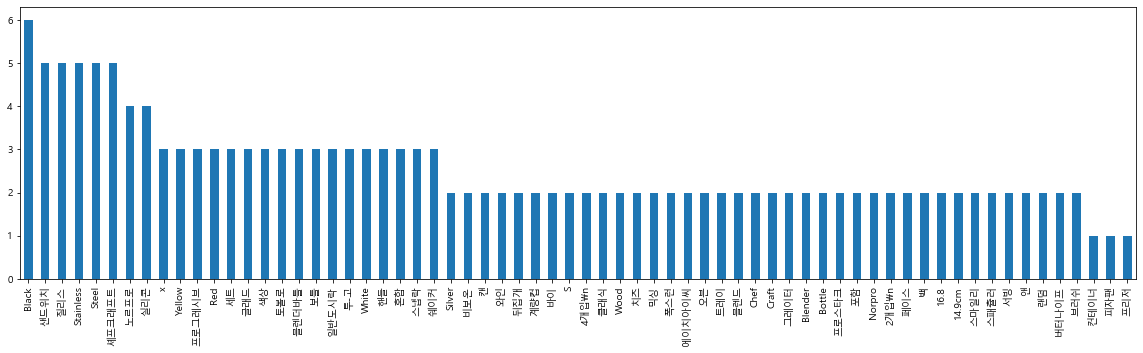

In [32]:
word_frequency_cp_dir_kit = nltk.FreqDist(word_dic_cp_dir_kit)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

cp_dir_kit_df = pd.DataFrame(list(word_frequency_cp_dir_kit.values()), word_frequency_cp_dir_kit.keys())
result_cp_dir_kit = cp_dir_kit_df.sort_values([0], ascending=False)

result_cp_dir_kit[4:70].plot(kind='bar', legend=False, figsize=(20,5))
plt.show()

### 해외 직구 순위 _ 홈인테리어

In [35]:
url_cp_dir_fur = 'https://www.coupang.com/np/categories/452106'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'}

res_cp_dir_fur = requests.get(url_cp_dir_fur, headers=headers)
soup_cp_dir_fur = BeautifulSoup(res_cp_dir_fur.content, 'html.parser')
data_cp_dir_fur = soup_cp_dir_fur.find_all('div', {'class':'name'})

print(url_cp_dir_fur)

https://www.coupang.com/np/categories/452106


In [36]:
for item_cp_dir_fur in data_cp_dir_fur:
    print(item_cp_dir_fur.get_text())


    Now Foods 100% 퓨어 페퍼민트 에센셜 오일, 30ml, 1개


    Now Foods 100% 퓨어 에센셜 오일, 30ml, 1개


    Now Foods 피스풀 슬립 에센셜 오일, Peaceful Sleep


    나우푸드 퓨어 에센셜 방향아로마오일, Cedarwood


    Now Foods 100% 퓨어 로즈마리 에센셜오일, 30ml, 1개


    Now Foods 100% 퓨어 에센셜 방향아로마 오일, 118ml, 1개


    Now Foods 100% 퓨어 에센셜 방향아로마 오일, 30ml, 1개


    클린로직 스트레치 목욕 & 샤워 클로스 샤워타월, 랜덤 발송, 1개


    Now Foods 100% 퓨어 에센셜 오일 레몬그라스, 30ml, 1개


    Now Foods 쟈스민 향 오일, 30ml, 1개


    미세스메이어스클린데이 소이 자캔들, Geranium, 1개


    어스테라퓨틱스 내추럴 바디 브러쉬, 단일 색상, 1개


    나우푸드 에센셜 방향아로마오일 티 트리, 118ml, 1개


    셰프크래프트 버스데이 생일초, Colorful, 12개입


    나우푸드 100% 퓨어 에센셜 방향아로마오일 10ml, Lavender


    Now Foods 오가닉 에센셜 오일 유칼립투스, Eucalyptus


    Cleanlogic 내추럴 코튼 스트레치 목욕 & 샤워 바디 클로스 샤워타월, White, 1개


    Now Foods 치얼 업 버터컵! 에센셜 오일, Cheer Up Buttercup


    Now Foods 에센셜 오일 100% 퓨어 파출리, 30ml, 1개


    스펙트럼 디벌스파이 애슐리 오버 더 캐비닛 헤어 드라이어 거치대 높이 14 x 너비 7.6 x 깊이 12.1cm, Satin Nickel, 1개


    Wilton 실버 캔들, 10개입


    프라부지스기프츠 옥타고날 타워 버너 인센스받침, Wood


    Cakemate

In [38]:
item_list_cp_dir_fur = []

for item_cp_dir_fur in data_cp_dir_fur:
    items_cp_dir_fur = item_cp_dir_fur.get_text()
    item_list_cp_dir_fur.append(items_cp_dir_fur)           

str_itemlist_cp_dir_fur = str(item_list_cp_dir_fur)

tokenized_cp_dir_fur = nltk.word_tokenize(str_itemlist_cp_dir_fur)

word_dic_cp_dir_fur = {}

for word in tokenized_cp_dir_fur:
    if word not in word_dic_cp_dir_fur:
        word_dic_cp_dir_fur[word] = 1 
    else:
        word_dic_cp_dir_fur[word] += 1
        
sorted_word_dic_cp_dir_fur = sorted(word_dic_cp_dir_fur.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_cp_dir_fur[:50]:
    print("{0}({1})".format(word, count), end=" ")

,(159) '\n(59) '(59) 1개\n(31) 에센셜(15) 오일(15) Now(14) Foods(14) 100(11) %(11) 퓨어(11) 30ml(7) x(7) &(5) 12개입\n(5) 혼합(5) 나우푸드(4) 방향아로마오일(4) 방향아로마(4) 자캔들(4) 내추럴(4) 생일초(4) 1개(4) 색상\n(4) 118ml(3) 목욕(3) 샤워(3) 클로스(3) 샤워타월(3) 색상(3) 프리미어얀스(3) 세트(3) iDESIGN(3) 스트레치(2) 랜덤(2) 발송(2) 바디(2) 단일(2) 셰프크래프트(2) 유칼립투스(2) 코튼(2) White(2) 업(2) 디벌스파이(2) 헤어(2) 드라이어(2) Satin(2) Nickel(2) Wilton(2) 프라부지스기프츠(2) 

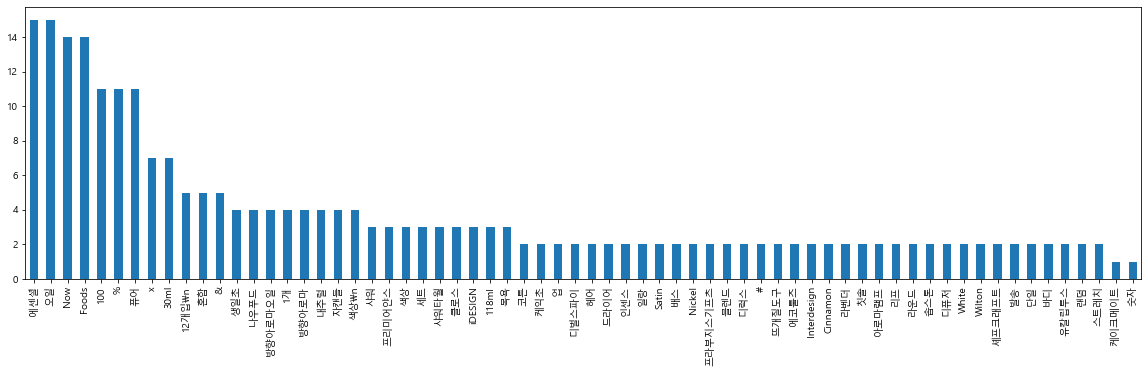

In [39]:
word_frequency_cp_dir_fur = nltk.FreqDist(word_dic_cp_dir_fur)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

cp_dir_fur_df = pd.DataFrame(list(word_frequency_cp_dir_fur.values()), word_frequency_cp_dir_fur.keys())
result_cp_dir_fur = cp_dir_fur_df.sort_values([0], ascending=False)

result_cp_dir_fur[4:70].plot(kind='bar', legend=False, figsize=(20,5))
plt.show()

### 해외 직구 순위 _ 문구/오피스

In [40]:
url_cp_dir_office = 'https://www.coupang.com/np/categories/460038'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'}

res_cp_dir_office = requests.get(url_cp_dir_office, headers=headers)
soup_cp_dir_office = BeautifulSoup(res_cp_dir_office.content, 'html.parser')
data_cp_dir_office = soup_cp_dir_office.find_all('div', {'class':'name'})

print(url_cp_dir_office)

https://www.coupang.com/np/categories/460038


In [41]:
for item_cp_dir_office in data_cp_dir_office:
    print(item_cp_dir_office.get_text())


    빅 크리스탈 엑스트라 볼드 펜 1.6mm, 혼합 색상, 8개입


    위드모르 플라스틱 매거진 오거나이저 파일꽂이 10.2 x 25 x 31.8cm, 혼합 색상, 5개입


    덕테이프 덕트 테이프, 1개, 9.1m


    뱃저 타투 밤 56g, 1개


    빅 메캐니컬 펜슬 샤프, 5개입, 0.5mm


    셰프크래프트 버스데이 생일초, Colorful, 12개입


    Rit 다목적 리퀴드 섬유염색제 탄, 236ml, 1개


    빅 엑스트라 스파클 메캐니컬 펜슬 샤프, 0.7mm, 10개입


    크레욜라 컬러드 펜슬 색연필, 36색


    리트다이 올 퍼포즈 공예용염료 아사바체 블랙, 236ml, 1개


    Rit 틴트 섬유염색제 페탈 핑크, 31.9g, 1개


    Wilton 실버 캔들, 10개입


    아이스콜라 마블 컴포지션 일반노트 24.7 x 19.0cm 100매입, 랜덤 발송, 1개


    Cakemate 네온 크레이지 컬 생일초, 혼합 색상, 12개입


    케이크워크 디너 디자인냅킨 워터컬러, 혼합 색상, 1개


    스카치 리무버블 포스터 양면테이프 19mm x 3.8m, 1개


    스트림라인 미니 스테이셔너리 문구 세트, 랜덤 발송, 1개


    페이퍼메이트 라이트 브로스 펜 1mm M, Blue, 10개입


    미드 그래프 페이퍼 4 쿼드릴 모눈종이, 20매입, 27.9 x 21.5cm


    미드 스펠-라이트 스테노 북 영어노트 15.2 x 22.8cm 80매입, Red, 1개


    페이퍼메이트 메캐니컬 펜슬 HB 샤프, 5개입, 0.7mm


    Rit 틴트 섬유염색제 다크 브라운, 31.9g, 1개


    Wilton 스파클러 캔들 17cm, 18개입


    미드 필러 페이퍼 컬리지 룰드 일반노트 26.6 x 20.3cm 200매입, 단일 색상, 1개


    Wilton 생일초 레인보우, 12개입


    Rit 다목적 리퀴

In [43]:
item_list_cp_dir_office = []

for item_cp_dir_office in data_cp_dir_office:
    items_cp_dir_office = item_cp_dir_office.get_text()
    item_list_cp_dir_office.append(items_cp_dir_office)           

str_itemlist_cp_dir_office = str(item_list_cp_dir_office)

tokenized_cp_dir_office = nltk.word_tokenize(str_itemlist_cp_dir_office)

word_dic_cp_dir_office = {}

for word in tokenized_cp_dir_office:
    if word not in word_dic_cp_dir_office:
        word_dic_cp_dir_office[word] = 1 
    else:
        word_dic_cp_dir_office[word] += 1
        
sorted_word_dic_cp_dir_office = sorted(word_dic_cp_dir_office.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_cp_dir_office[:50]:
    print("{0}({1})".format(word, count), end=" ")

,(173) '\n(60) '(60) 1개\n(30) Rit(11) 섬유염색제(11) 색상(9) x(9) 236ml(8) 펜(7) 펜슬(7) 다목적(7) 리퀴드(7) 빅(6) 혼합(6) 페이퍼(6) 12개입\n(5) 10개입\n(5) Blue(5) 생일초(4) 틴트(4) 31.9g(4) 랜덤(4) 케이크워크(4) 미드(4) 룰드(4) 엑스트라(3) 1개(3) 메캐니컬(3) 샤프(3) Wilton(3) 일반노트(3) 발송(3) 디자인냅킨(3) 필러(3) 단일(3) 볼(3) 와이드(3) 블루(3) 크리스탈(2) 5개입\n(2) 덕트(2) 테이프(2) 5개입(2) 셰프크래프트(2) 0.7mm(2) 올(2) 퍼포즈(2) 캔들(2) 컴포지션(2) 

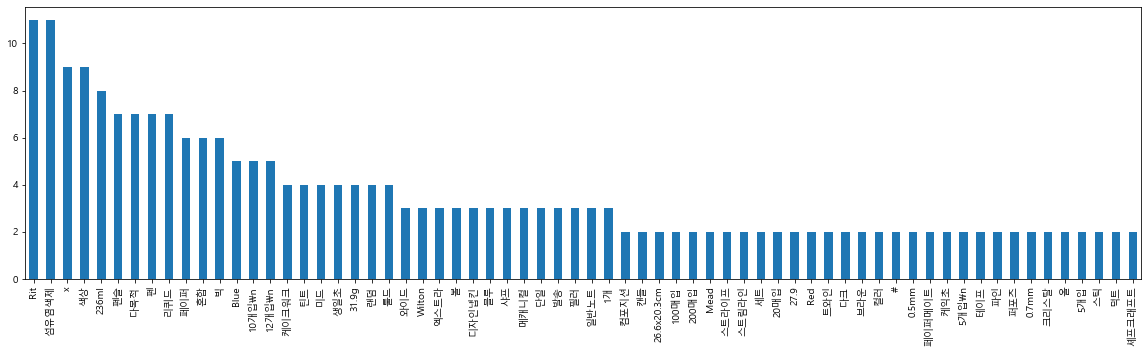

In [44]:
word_frequency_cp_dir_office = nltk.FreqDist(word_dic_cp_dir_office)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

cp_dir_office_df = pd.DataFrame(list(word_frequency_cp_dir_office.values()), word_frequency_cp_dir_office.keys())
result_cp_dir_office = cp_dir_office_df.sort_values([0], ascending=False)

result_cp_dir_office[4:70].plot(kind='bar', legend=False, figsize=(20,5))
plt.show()